In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import FileLink
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Cleaning the data
### Specifically Dates

In [2]:
judgeData=pd.read_csv('/kaggle/input/indianjudgedata/judges_clean.csv',index_col='ddl_judge_id')
judgeData.head(10)

,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
ddl_judge_id,,,,,,,
1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018
6,1,1,1,chief judicial magistrate,1 female,09-07-2018,NaN
7,1,1,1,civil judge junior division,0 nonfemale,01-06-2011,09-06-2013
8,1,1,1,civil judge junior division,0 nonfemale,06-06-2011,08-06-2014
9,1,1,1,civil judge junior division,0 nonfemale,11-06-2012,31-05-2015


True
ddl_judge_id
53972    True
Name: female_judge, dtype: bool
state_code                               11
dist_code                                 1
court_no                                  4
judge_position    judicial magistrate court
female_judge                            NaN
start_date                       20-06-2011
end_date                         31-10-2014
Name: 53972, dtype: object


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


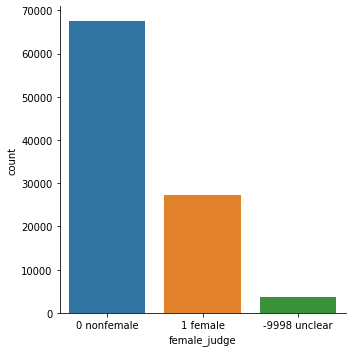

In [3]:
# checking out the distribution of male and female judges in the data
nullCheck=judgeData['female_judge'].isnull()
print(nullCheck.any())
print(nullCheck[nullCheck==True])

# a Null value is present
print(judgeData.loc[53972])

judgeData.dropna(subset=['female_judge'])

sns.factorplot(data=judgeData,x='female_judge',kind='count')

In [4]:
# the ratio is more than 2 times
print(len(judgeData[judgeData['female_judge']=='0 nonfemale'])/len(judgeData[judgeData['female_judge']=='1 female']))

2.482905668700831


In [5]:
judgeData['start_date']=pd.to_datetime(judgeData['start_date'],format='%d-%m-%Y',errors='coerce')
judgeData['end_date']=pd.to_datetime(judgeData['end_date'],format='%d-%m-%Y',errors='coerce')
print(judgeData.dtypes)
judgeData.head(10)

state_code                 int64
dist_code                  int64
court_no                   int64
judge_position            object
female_judge              object
start_date        datetime64[ns]
end_date          datetime64[ns]
dtype: object


,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
ddl_judge_id,,,,,,,
1,1,1,1,chief judicial magistrate,0 nonfemale,2013-09-20,2014-02-20
2,1,1,1,chief judicial magistrate,0 nonfemale,2013-10-31,2014-02-20
3,1,1,1,chief judicial magistrate,0 nonfemale,2014-02-21,2016-05-31
4,1,1,1,chief judicial magistrate,0 nonfemale,2016-06-01,2016-06-06
5,1,1,1,chief judicial magistrate,0 nonfemale,2016-06-06,2018-07-07
6,1,1,1,chief judicial magistrate,1 female,2018-07-09,NaT
7,1,1,1,civil judge junior division,0 nonfemale,2011-06-01,2013-06-09
8,1,1,1,civil judge junior division,0 nonfemale,2011-06-06,2014-06-08
9,1,1,1,civil judge junior division,0 nonfemale,2012-06-11,2015-05-31


In [6]:
print(judgeData.shape)
judgeData=judgeData.dropna(subset=['start_date','end_date'])
print(judgeData.shape)

(98478, 7)
(80320, 7)


### processing the dates

In [7]:
judgeData['start_date']=judgeData['start_date'].dt.year
judgeData['end_date']=judgeData['end_date'].dt.year
judgeData.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
ddl_judge_id,,,,,,,
1,1,1,1,chief judicial magistrate,0 nonfemale,2013,2014
2,1,1,1,chief judicial magistrate,0 nonfemale,2013,2014
3,1,1,1,chief judicial magistrate,0 nonfemale,2014,2016
4,1,1,1,chief judicial magistrate,0 nonfemale,2016,2016
5,1,1,1,chief judicial magistrate,0 nonfemale,2016,2018
7,1,1,1,civil judge junior division,0 nonfemale,2011,2013
8,1,1,1,civil judge junior division,0 nonfemale,2011,2014
9,1,1,1,civil judge junior division,0 nonfemale,2012,2015
10,1,1,1,civil judge junior division,0 nonfemale,2013,2014


In [8]:
print('start date min max:',judgeData['start_date'].min(),judgeData['start_date'].max())
print('end date min max:',judgeData['end_date'].min(),judgeData['end_date'].max())

start date min max: 1966 2020
end date min max: 1967 2020


,year,sex,judges
0,1966,female,1
1,1966,nonfemale,0
2,1967,female,1
3,1967,nonfemale,1
4,1968,female,0
5,1968,nonfemale,2
6,1969,female,0
7,1969,nonfemale,1
8,1970,female,1
9,1970,nonfemale,1


<AxesSubplot:xlabel='year', ylabel='judges'>

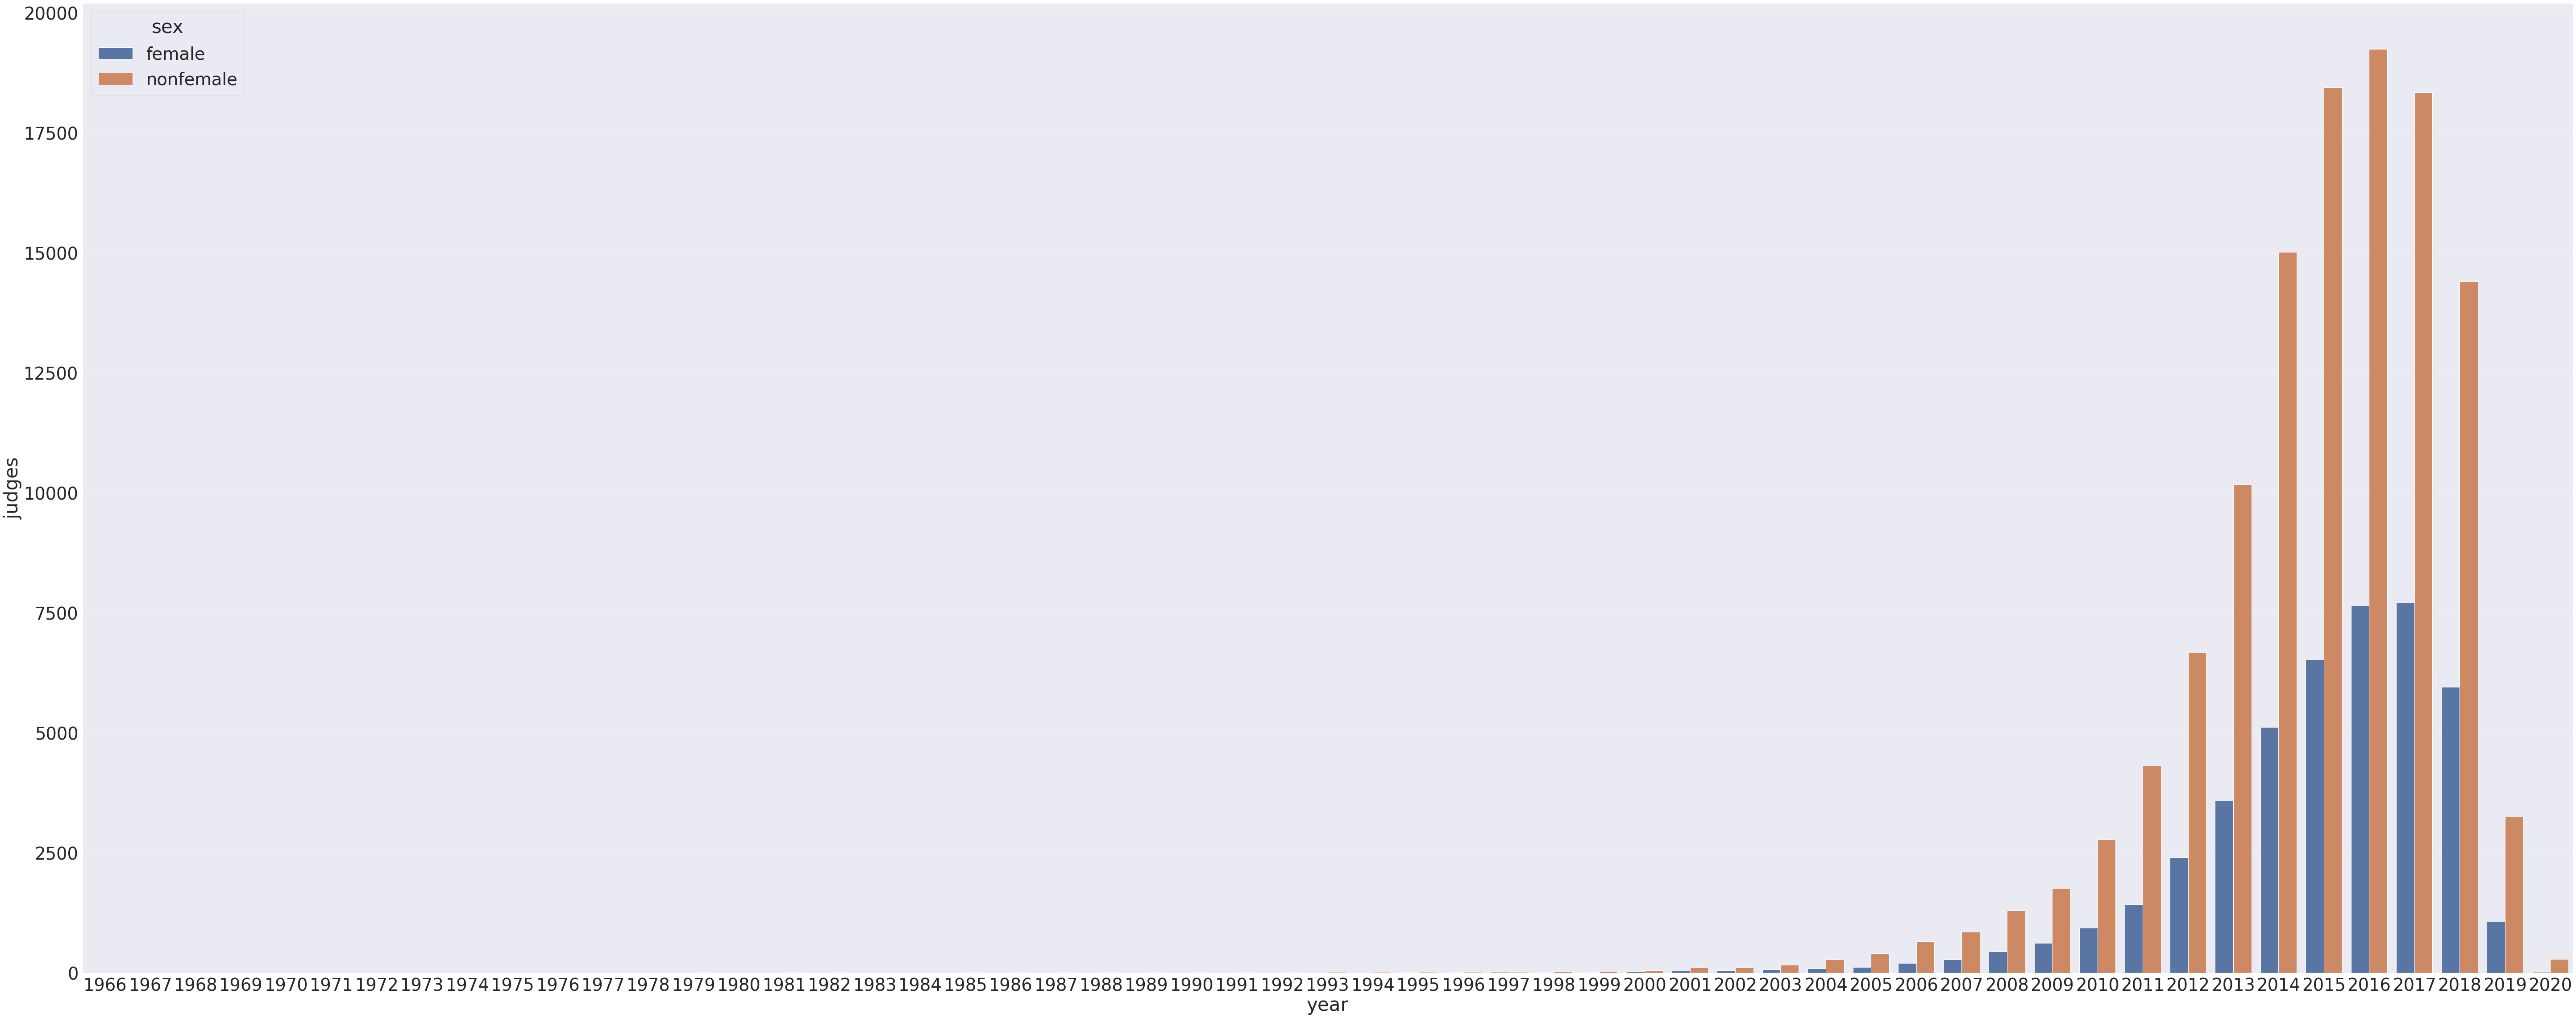

In [11]:
# calculating how many female and male judges over time
genderData=[]
genderSeparated=judgeData.groupby('female_judge')
nonfemale=genderSeparated.get_group('0 nonfemale')
female=genderSeparated.get_group('1 female')
genderRatios=[]


for year in range(1966,2021):
    femaledata=[year,'female']
    nonfemaledata=[year,'nonfemale']
    nonfemalecount=len(nonfemale[((nonfemale['start_date']<=year) & (nonfemale['end_date']>=year))])
    femalecount=len(female[((female['start_date']<=year) & (female['end_date']>=year))])
    
    nonfemaledata.append(nonfemalecount)
    femaledata.append(femalecount)
    genderData.append(femaledata)
    genderData.append(nonfemaledata)
    if femalecount!=0:
        genderRatios.append([year,nonfemalecount/femalecount])
    
    
gd=pd.DataFrame(genderData,columns=['year','sex','judges'])
display(gd.head(10))
sns.set(font_scale=3.5)
fig,axs=plt.subplots(1,1,figsize=(100,40))
sns.barplot(data=gd,x='year',y='judges',hue='sex',ax=axs)


<AxesSubplot:xlabel='year', ylabel='ratio'>

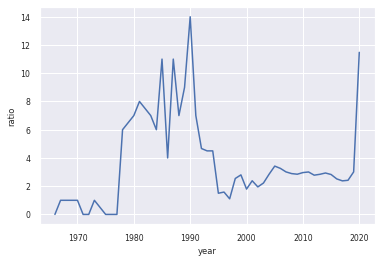

In [15]:
sns.set(font_scale=0.7)
gr=pd.DataFrame(genderRatios,columns=['year','ratio'])
sns.lineplot(data=gr,x='year',y='ratio')

### 2019 and 2020 are really not representative of real world data since the ratio abrubptly increases
### it may be because of less data collection on judges for those two years
### data on years before 2000 is also scarce and thus the ratios are erratic